#### Probability is a way of quantifying the uncertainty associated with events chosen from some universe of events.

## Dependence and Independence

#### We say that two events E and F are dependent if knowing something about whether E happens, gives us information about whether F happens (and vice versa). Otherwise, they are independent.

### Two events E and F are independent if

+ P(E,F) = P(E)P(F)

### Conditional Probability

##### If events E and F are not independent (and if the probability of F is not zero), then we define the probability of E “conditional on F” as:

+ P(E|F) = P(E,F)/P(F)


### One common tricky example involves a family with two (unknown) children. If we assume that:

#### Each child is equally likely to be a boy or a girl.

#### The gender of the second child is independent of the gender of the first child.

#### Then the event “no girls” has probability 1/4, the event “one girl, one boy” has probability 1/2, and the event “two girls” has probability 1/4.

In [1]:
## We can check this by “generating” a lot of families:

import enum, random

# An Enum is a typed set of enumerated values. We can use them
# to make our code more descriptive and readable.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)     # 0.500 ~ 1/2
print("P(both | either): ", both_girls / either_girl)  # 0.331 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## Baye's Theorm :-
### is a way of “reversing” conditional probabilities.

+ i.e.  P(E|F) = P(F|E)*P(E)/P(F)

#### Baye's Theorm is oftem stated as 

+ P(E|F) =  P(F|E)*P(E) / [P(F|E)*P(E) + P(F|E')*P(E')]

Because 
P(F) = [P(F|E)*P(E) + P(F|E')*P(E')]

### A random variable is a variable whose possible values have an associated probability distribution.

### The associated distribution gives the probabilities that the variable realizes each of its possible values.

### Expected value of a random variable, which is the average of its values weighted by their probabilities. The coin flip variable has an expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range(10) variable has an expected value of 4.5


## Continuous Distributions

### A coin flip corresponds to a discrete distribution—one that associates positive probability with discrete outcomes.

### we represent a continuous distribution with a probability density function (PDF) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval.


#### In other words if a distribution has density function f, then the probability of seeing a value between x and x + h is approximately h * f(x) if h is small.

### The density function for the uniform distribution is just:

In [2]:
def uniform_pdf(x :float) -> float:
    return 1 if 0 <= x < 1 else 0

### Python’s random.random is a (pseudo)random variable with a uniform density.

#### We will often be more interested in the cumulative distribution function (CDF), which gives the probability that a random variable is less than or equal to a certain value. It’s not hard to create the CDF for the uniform distribution :

In [3]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

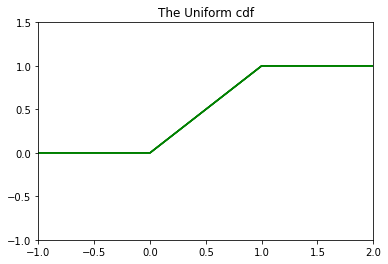

In [4]:
import matplotlib.pyplot as plt
for _ in range(-1,3):
    xs = range(-1,3)
    ys = [uniform_cdf(i) for i in xs]
    plt.plot(xs,ys,'g')
    plt.plot
    plt.axis([-1,2,-1,1.5])
plt.title("The Uniform cdf")
plt.show()

## Normal Distribution

### The normal distribution is the classic bell curve–shaped distribution and is completely determined by two parameters: 
### its mean μ (mu) and its standard deviation σ (sigma). 
### The mean indicates where the bell is centered, and the standard deviation how “wide” it is.


### It's Probability Distribution function is given by 
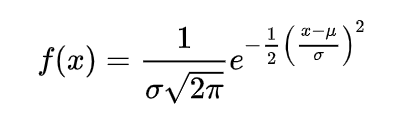


It can be implimented as 

In [5]:
import math
sqrt_two_pi = math.sqrt(2*math.pi)

def normal_pdf(x :float, mu :float =0,sigma :float = 1) -> float:
    """
    Normal distribution plot for following inputs
    1. x 
    2. mu - mean
    3. sigma - Standard deviation
    """
    return (math.exp(-(x-mu)**2/(2*sigma**2))/(sigma*sqrt_two_pi))

### Various normal disribution plots

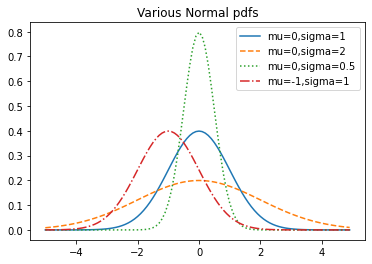

In [6]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

### When μ = 0 and σ = 1, it’s called the standard normal distribution. If Z is a standard normal random variable, then it turns out that:

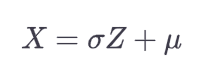

#### The CDF for the normal distribution cannot be written in an “elementary” manner, but we can write it using Python’s math.erf

In [7]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    Cummlative normal distribution function with parametes
    1. x
    2. mu :- mean default 0
    3. sigma :- Standard deviation default 1
    """
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

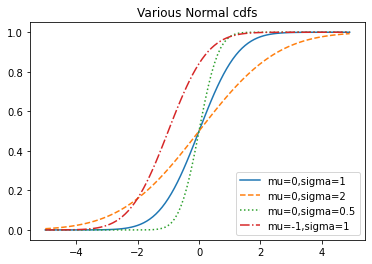

In [8]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

### Sometimes we’ll need to invert normal_cdf to find the value corresponding to a specified probability. There’s no simple way to compute its inverse, but normal_cdf is continuous and strictly increasing, so we can use a binary search:

In [9]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the CDF's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

### The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability

## The Central Limit Theorem

### It says (in essence) that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.

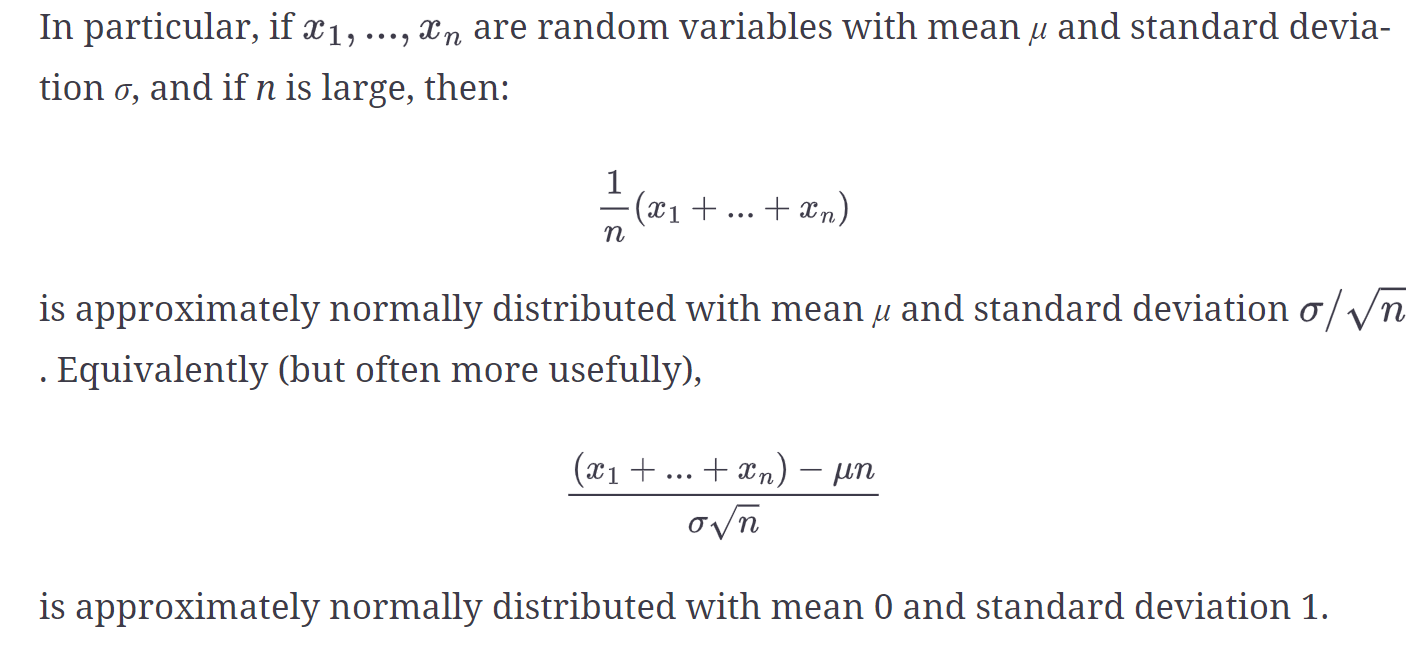

## An easy way to illustrate this is by looking at binomial random variables, which have two parameters n and p.

In [10]:
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

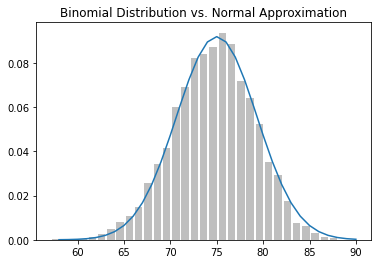

In [11]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
binomial_histogram(0.75, 100, 10000)